# Linear Regression With Time Series

[link](https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial)

After finishing this course, you'll know how to:

engineer features to model the major time series components (trends, seasons, and cycles),
visualize time series with many kinds of time series plots,
create forecasting hybrids that combine the strengths of complementary models, and
adapt machine learning methods to a variety of forecasting tasks.

As part of the exercises, you'll get a chance to participate in our [Store Sales - Time Series Forecasting](https://www.kaggle.com/c/29781) Getting Started competition. In this competition, you're tasked with forecasting sales for _Corporación Favorita_ (a large Ecuadorian-based grocery retailer) in almost 1800 product categories.

## What is a Time Series?

The basic object of forecasting is the time series, which is a set of observations recorded over time. In forecasting applications, the observations are typically recorded with a regular frequency, like daily or monthly.


In [1]:
import pandas as pd
df = pd.read_csv('book_sales.csv',
                 index_col='Date',
                 parse_dates=['Date']).drop('Paperback', axis=1)

In [2]:
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


This series records the number of hardcover book sales at a retail store over 30 days. Notice that we have a single column of observations Hardcover with a time index Date.

## Linear Regression with Time Series

For the first part of this course, we'll use the linear regression algorithm to construct forecasting models. Linear regression is widely used in practice and adapts naturally to even complex forecasting tasks.

The __linear regression__ algorithm learns how to make a weighted sum from its input features. For two features, we would have:

`target = weight_1 * feature_1 + weight_2 * feature_2 + bias`

During training, the regression algorithm learns values for the parameters weight_1, weight_2, and bias that best fit the target. (This algorithm is often called ordinary least squares since it chooses values that minimize the squared error between the target and the predictions.) The weights are also called __regression coefficients__ and the bias is also called the __intercept__ because it tells you where the graph of this function crosses the y-axis.

### Time-step features

There are two kinds of features unique to time series: time-step features and lag features.

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the __time dummy__, which counts off time steps in the series from beginning to end.

In [5]:
import numpy as np
print(len(df.index))
df['Time'] = np.arange(len(df.index))

30


In [4]:
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


Linear regression with the time dummy produces the model:

`target = weight * time + bias`

The time dummy then lets us fit curves to time series in a time plot, where Time forms the x-axis.

Text(0.5, 1.0, 'Time plot of Hardcover Scales')

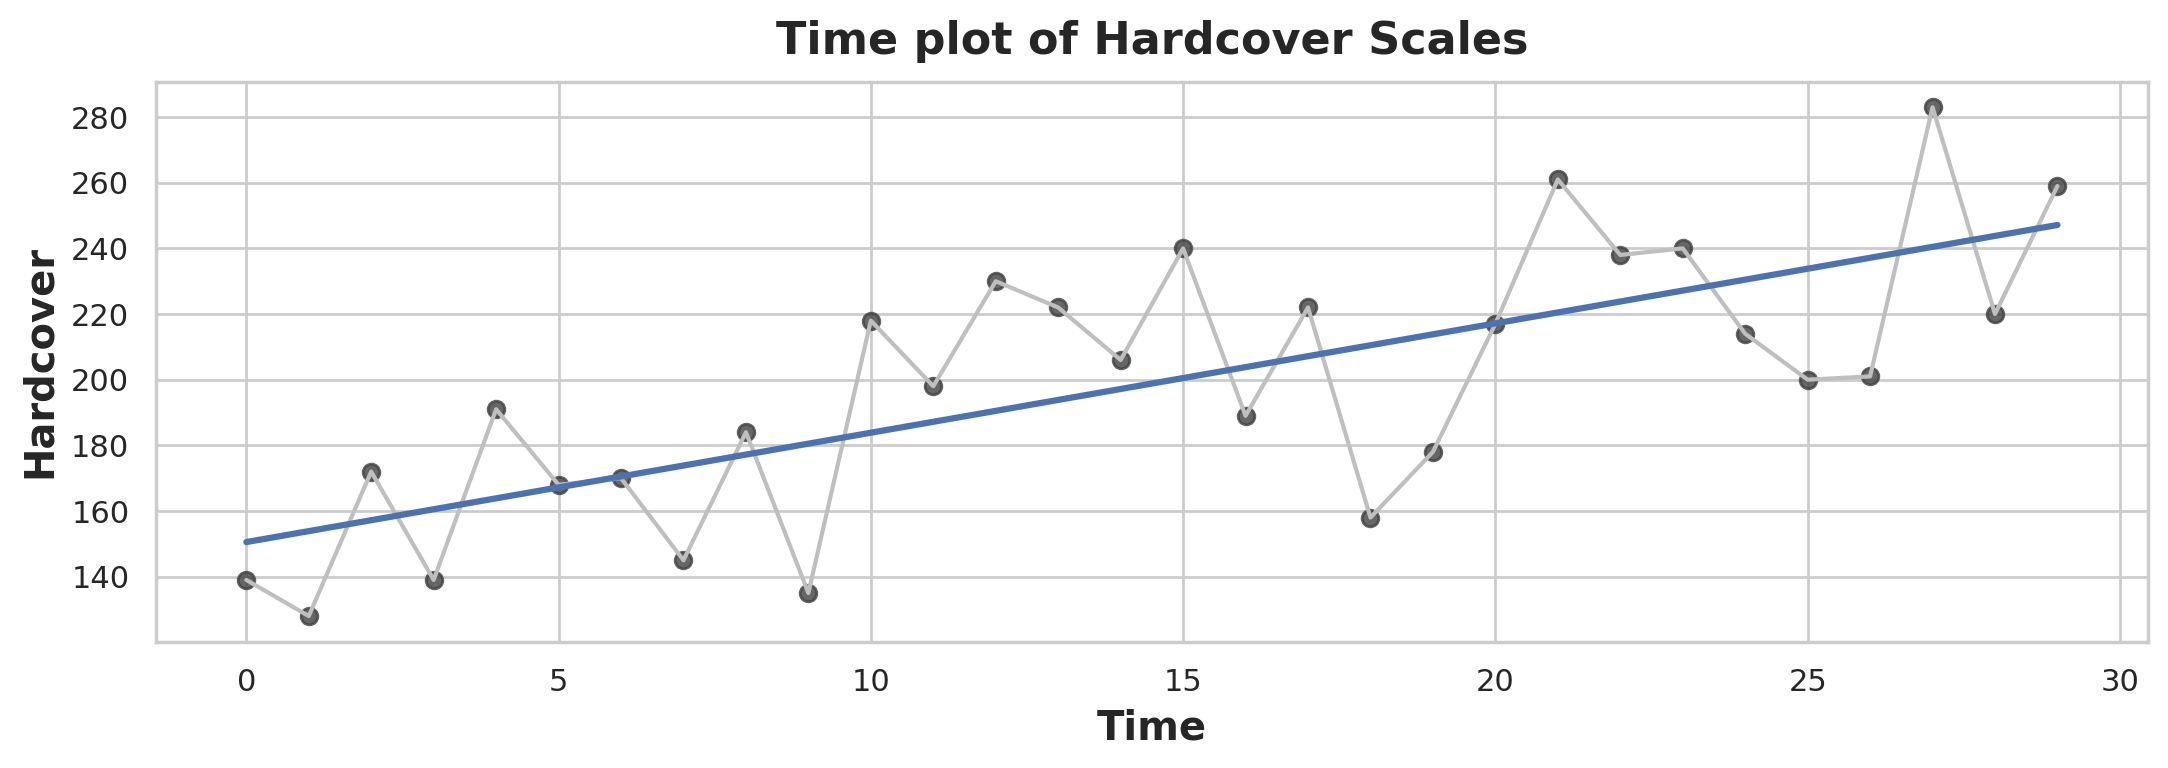

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

plt.rc(group="figure", 
       autolayout=True,
       figsize=(11,4),
       titlesize=18,
       titleweight='bold')

plt.rc(group="axes",
      labelweight='bold',
      labelsize='large',
      titleweight='bold',
      titlesize=16,
      titlepad=10)

%config InlineBackend.figure_format='retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df,
                ci=None, scatter_kws=dict(color='0.25'))

ax.set_title('Time plot of Hardcover Scales')